Make a list with duplicates, sort it then remove any duplicates.

In [109]:
import random

In [110]:
my_list = [random.randint(1, 10) for i in range(10)]
my_list

[1, 8, 2, 9, 6, 8, 7, 1, 4, 1]

In [111]:
my_list.sort()
my_list

[1, 1, 1, 2, 4, 6, 7, 8, 8, 9]

In [112]:
list(set(my_list))

[1, 2, 4, 6, 7, 8, 9]

Dictionary: 
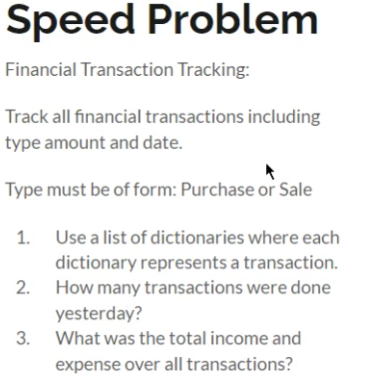

In [113]:
import re
import random
from datetime import datetime, timedelta

In [114]:
transactions_dir: list[dict] = [{
    'type': random.choice(["purchase", "sale"]),
    'amount': float(random.randint(1, 1000_00)/100),
    'date': (datetime.today() - timedelta(days=random.randint(1, 5))).strftime(r'%Y-%m-%d')
    } for _ in range(100)]  # generate random transactions
#transactions

In [115]:
#(2) How many transactions were done yesterday?
yesterday_str = (datetime.today() - timedelta(days=1)).strftime(r'%Y-%m-%d')
filter_day = lambda x: x['date'] == yesterday_str

print(len(list(filter(filter_day, transactions_dir))))

23


In [116]:
#(extra) check if date has valid format
date_format = re.compile(r'^\d{4}-\d{2}-\d{2}$')  # YYYY-MM-DD

transactions_dir[0] = {'type': 'purchase', 'amount': 100.0, 'date': '2021-01-01'}
transactions_dir[1] = {'type': 'purchase', 'amount': 1e500, 'date': ' 1000-01-01'}
transactions_dir[2] = {'type': 'purchase', 'amount': 100.0, 'date': '200-01-01'}
transactions_dir[3] = {'type': 'a', 'amount': .0, 'date': '-2500-01-01'}
transactions_dir[4] = {'type': 'a', 'amount': 0,  'date': '-456-01-01'}
transactions_dir[5] = {'type': 'a', 'amount': -1, 'date': '0000-00-00'}
transactions_dir[6] = {'type': 'sale', 'amount': 100.0, 'date': '0000.00.00'}
transactions_dir[7] = {'type': 'sale', 'amount': 100.0, 'date': '01.01.2025'}
transactions_dir[8] = {'type': 'sale', 'amount': 100.0, 'date': '2020 01 01'}
transactions_dir[9] = {'type': 'sale', 'amount': 100.0, 'date': 'abcd-ef-gh'}

for transaction in transactions_dir[:10]:
    if not date_format.match(transaction['date']):
        print(f"Invalid date format: {transaction['date']}")
    else:
        print(f"Valid date format:   {transaction['date']}")

Valid date format:   2021-01-01
Invalid date format:  1000-01-01
Invalid date format: 200-01-01
Invalid date format: -2500-01-01
Invalid date format: -456-01-01
Valid date format:   0000-00-00
Invalid date format: 0000.00.00
Invalid date format: 01.01.2025
Invalid date format: 2020 01 01
Invalid date format: abcd-ef-gh


In [117]:
#(3) find total income & expense
total_income = sum([x['amount'] for x in transactions_dir if x['type'] == 'sale'])
total_expense = sum([x['amount'] for x in transactions_dir if x['type'] == 'purchase'])

print(f"Total Income: {total_income:.2f}; Total Expense: {total_expense:.2f}")

Total Income: 27630.33; Total Expense: inf


Now with classes:

In [118]:
class transaction:
    def __init__(self, type: int, amount: float, date: int):
        if not isinstance(type, int):
            raise TypeError('type must be an integer')
        if not type in [1, 2]:
            raise ValueError('type must be 1 (Purchase) or 2 (Sale)')
        
        if not isinstance(amount, (float, int)):
            raise TypeError('amount must be a float')
        
        if not isinstance(date, int):
            raise TypeError('date must be an integer (unix timestamp secs)')

        self.type = type
        self.amount = amount
        self.date = date

In [119]:
transactions: list[transaction] = [transaction(
    type=random.choice([1, 2]),
    amount=float(random.randint(1, 1000_00)/100),
    date=int((datetime.now() - timedelta(seconds=random.randint(1, 5*24*60*60))).timestamp())
    ) for _ in range(100)]  # generate random transactions

In [120]:
#(2) How many transactions were done yesterday?

todayStart = datetime.today().replace(hour=0, minute=0, second=0, microsecond=0)

yesterday = 0
for t in transactions:
    if int((todayStart-timedelta(days=1)).timestamp()) <= t.date < int(todayStart.timestamp()):
        yesterday += 1

print(f'There were {yesterday} transactions yesterday')

There were 20 transactions yesterday


In [121]:
#(3) find total income & expense
total_income = 0
total_expense = 0
for t in transactions:
    if t.type == 1:
        total_expense += t.amount
    elif t.type == 2:
        total_income += t.amount
    else:
        raise ValueError('invalid transaction type')

print(f"Total Income: {total_income:.2f}; Total Expense: {total_expense:.2f}")

Total Income: 22387.67; Total Expense: 30873.01


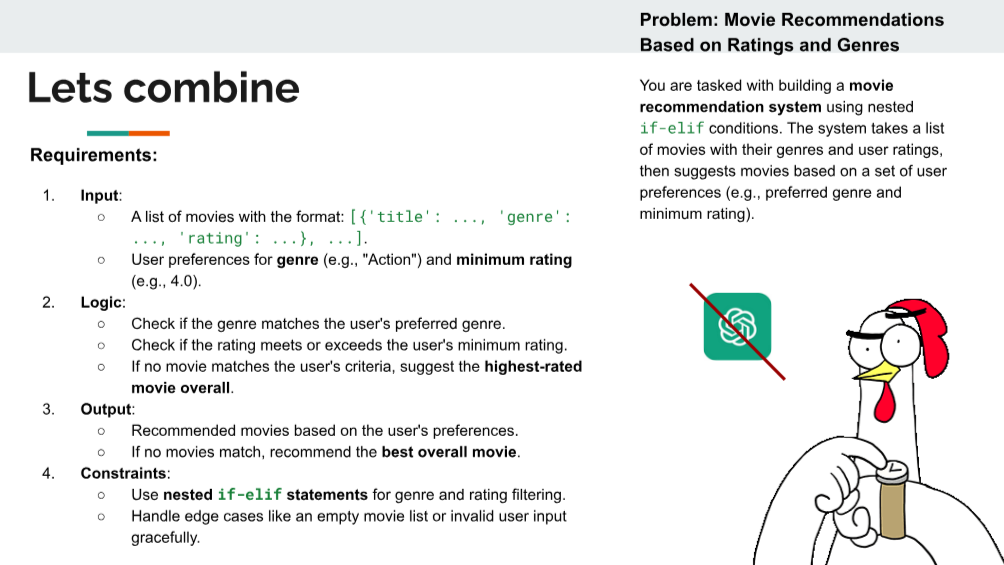

In [122]:
def reccomendMovies(moviesList: list[dict], prefferedGenre: str, prefferedMinRating: float) -> list[dict]:
    if not isinstance(moviesList, list):
        raise TypeError('moviesList must be a list')
    if not all(isinstance(x, dict) for x in moviesList):
        raise TypeError('moviesList must contain only dictionaries')
    if not isinstance(prefferedGenre, str):
        raise TypeError('prefferedGenre must be a string')
    if not isinstance(prefferedMinRating, float):
        raise TypeError('prefferedMinRating must be a float')
    if not 0 <= prefferedMinRating <= 10:
        raise ValueError('prefferedMinRating must be between 0 and 10')
    
    reccomendMovies = []

    genre_format = re.compile(prefferedGenre, re.IGNORECASE)

    for movie in moviesList:
        if genre_format.search(movie['genre']) and movie['rating'] >= prefferedMinRating:
            reccomendMovies.append(movie)



    if not reccomendMovies:
        return [sorted(moviesList, key=lambda x: x['rating'], reverse=True)[0]]  # return highest rated movie
    
    return reccomendMovies

In [124]:
def queryGenre():
    while True:
        genre = input(f'Please enter your preffered genre: ')
        if len(genre) > 0:
            break
    return genre

def queryMinRating():
    while True:
        try:
            minRating = float(input(f'Please enter your preffered minimum rating: '))
            if 0 <= minRating <= 10:
                break
        except ValueError:
            pass
    return minRating

In [125]:
moviesList = [{
    'genre': random.choice(['action', 'comedy', 'drama', 'horror', 'romance']),
    'rating': random.randint(1, 10)
    } for _ in range(100)]  # generate random movies

In [127]:
reccomendMovies(moviesList, queryGenre(), queryMinRating())

[{'genre': 'action', 'rating': 10}]